# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the northern hemisphere tends to be warmer this time of year than the sourthern hemisphere. This may be due to the tilt of the earth (summer in northern hemisphere).
* There is no strong relationship between latitude and humidity. However, it is interesting to see that a strong band of cities sits between 80 and 100% humidity.
* There is no strong relationship between latitude and wind speed. 
* All the graphs look denser for latitudes more than 0. This is simply because there are more number of cities in northern hemisphere than in southern hemisphere.

---


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={api_key}&units={units}&q="

#counters for counting records in sets
record_count=1
set_count = 1

# empty dictionary to collect info 
weather_dict = {"Cities": [], "Country": [], "Latitude": [], "Date": [],"Max. Temperature": [], "Humidity": [], 
                           "Cloudiness": [], "Wind Speed": []}

print(" Beginning Data Retrieval \n-----------------------------")

for city_index in range(len(cities)):
    
        city_url= cities[city_index].replace(" ", "%20")  #--to format cities names with more than one word
        weather_response = requests.get(query_url+city_url).json()
        print(query_url+city_url)
        
        if weather_response['cod']=='404':
            print("City not found. Skipping...")
        else:
            print(f"Processing Record {record_count} of Set {set_count} | {cities[city_index]}")
            try:
                date = time.strftime('%m-%d-%y', time.localtime(weather_response['dt'])) # to collect only date component
                weather_dict["Date"].append(date)
                weather_dict["Cities"].append(cities[city_index])
                weather_dict["Country"].append(weather_response['sys']['country'])          
                weather_dict["Latitude"].append(weather_response['coord']['lat'])
                weather_dict["Humidity"].append(weather_response['main']['humidity'])
                weather_dict["Max. Temperature"].append(weather_response['main']['temp_max'])
                weather_dict["Cloudiness"].append(weather_response['clouds']['all'])
                weather_dict["Wind Speed"].append(weather_response['wind']['speed']) 
            except KeyError:
                print(f"Data not complete for {cities[city_index]}..so skipping..")
                
            if (record_count%50==0):
                set_count+=1 
                record_count=1
            else:    
                record_count+=1

print("-----------------------------\n Data Retrieval Complete \n-----------------------------")

 Beginning Data Retrieval 
-----------------------------
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=goderich
Processing Record 1 of Set 1 | goderich
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=saldanha
Processing Record 2 of Set 1 | saldanha
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=qaanaaq
Processing Record 3 of Set 1 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=baraki%20barak
Processing Record 4 of Set 1 | baraki barak
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=kapaa
Processing Record 5 of Set 1 | kapaa
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=hermanus
Processing Record 6 of Set 1 | hermanus
http://api.openweathermap.org/data/2.5/we

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=huarmey
Processing Record 48 of Set 1 | huarmey
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=searcy
Processing Record 49 of Set 1 | searcy
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=dingle
Processing Record 50 of Set 1 | dingle
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=tiznit
Processing Record 1 of Set 2 | tiznit
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=kaitangata
Processing Record 2 of Set 2 | kaitangata
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=atuona
Processing Record 3 of Set 2 | atuona
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=deep%20riv

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=laiyang
Processing Record 49 of Set 2 | laiyang
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=bintulu
Processing Record 50 of Set 2 | bintulu
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=tursunzoda
Processing Record 1 of Set 3 | tursunzoda
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=khatanga
Processing Record 2 of Set 3 | khatanga
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=tallahassee
Processing Record 3 of Set 3 | tallahassee
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=dina
Processing Record 4 of Set 3 | dina
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=bonavista
Processing Record 49 of Set 3 | bonavista
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=uvalde
Processing Record 50 of Set 3 | uvalde
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=viedma
Processing Record 1 of Set 4 | viedma
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=severo-kurilsk
Processing Record 2 of Set 4 | severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=traverse%20city
Processing Record 3 of Set 4 | traverse city
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=fortuna
Processing Record 4 of Set 4 | fortuna
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=haines%20junction
Processing Record 48 of Set 4 | haines junction
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=veraval
Processing Record 49 of Set 4 | veraval
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=grand%20river%20south%20east
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=ust-nera
Processing Record 50 of Set 4 | ust-nera
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=joaquim%20gomes
Processing Record 1 of Set 5 | joaquim gomes
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=saint-augustin
Processing Record 2 of Set 5 | saint-augustin
http://api.openweathermap.org/data/2.5/weather?appi

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=carbonia
Processing Record 50 of Set 5 | carbonia
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=palmer
Processing Record 1 of Set 6 | palmer
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=sept-iles
Processing Record 2 of Set 6 | sept-iles
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=saskylakh
Processing Record 3 of Set 6 | saskylakh
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=vila%20franca%20do%20campo
Processing Record 4 of Set 6 | vila franca do campo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=turbat
Processing Record 5 of Set 6 | turbat
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eec

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=popondetta
Processing Record 2 of Set 7 | popondetta
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=tapes
Processing Record 3 of Set 7 | tapes
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=wichian%20buri
Processing Record 4 of Set 7 | wichian buri
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=upernavik
Processing Record 5 of Set 7 | upernavik
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=northam
Processing Record 6 of Set 7 | northam
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=komsomolskiy
Processing Record 7 of Set 7 | komsomolskiy
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9e

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=kanor
Processing Record 2 of Set 8 | kanor
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=esperance
Processing Record 3 of Set 8 | esperance
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=umm%20lajj
Processing Record 4 of Set 8 | umm lajj
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=nova%20gradiska
Processing Record 5 of Set 8 | nova gradiska
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=namatanai
Processing Record 6 of Set 8 | namatanai
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=provideniya
Processing Record 7 of Set 8 | provideniya
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=silver%20city
Processing Record 3 of Set 9 | silver city
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=severnyy
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=kapoeta
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=oranjemund
Processing Record 4 of Set 9 | oranjemund
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=panormos
Processing Record 5 of Set 9 | panormos
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=warqla
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=azimur
City not found. Ski

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=baykit
Processing Record 49 of Set 9 | baykit
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=kota%20bahru
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=kyakhta
Processing Record 50 of Set 9 | kyakhta
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=iralaya
Processing Record 1 of Set 10 | iralaya
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=olafsvik
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=urucara
Processing Record 2 of Set 10 | urucara
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=shelburne
Processing Reco

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=puerto%20madryn
Processing Record 47 of Set 10 | puerto madryn
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=todos%20santos
Processing Record 48 of Set 10 | todos santos
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=jalu
Processing Record 49 of Set 10 | jalu
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=mangai
Processing Record 50 of Set 10 | mangai
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=gobabis
Processing Record 1 of Set 11 | gobabis
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=coahuayana
Processing Record 2 of Set 11 | coahuayana
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=sakakah
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=krivosheino
Processing Record 46 of Set 11 | krivosheino
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=rodna
Processing Record 47 of Set 11 | rodna
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=zaragoza
Processing Record 48 of Set 11 | zaragoza
-----------------------------
 Data Retrieval Complete 
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
weather_df = pd.DataFrame(weather_dict) 
#Data cleaning
weather_df = weather_df[weather_df['Humidity']<=100]  # -- few weather reports have erroneous data of more than 100% humidity
#Save to csv file
weather_df.to_csv("Output/Weather_info.csv")

In [9]:
#Select data from weather for a single date
date_today = max(weather_df["Date"].value_counts().keys())  #-- to select the date which most of the weather data belongs to.
weather_today = weather_df.loc[weather_df["Date"]==date_today,:]  #-- to filter data for single date 
weather_today.head()

,Cities,Country,Latitude,Date,Max. Temperature,Humidity,Cloudiness,Wind Speed
0,goderich,CA,43.74,09-09-18,17.23,66,88,9.96
1,saldanha,PT,41.42,09-09-18,16.48,80,48,1.76
2,qaanaaq,GL,77.48,09-09-18,-1.53,100,0,3.21
3,baraki barak,AF,33.97,09-09-18,21.00,49,0,1.00
4,kapaa,US,22.08,09-09-18,28.90,79,40,5.10


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

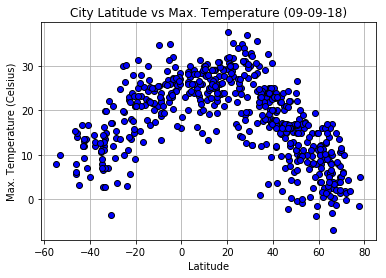

In [10]:
plt.scatter(weather_today["Latitude"], weather_today["Max. Temperature"], marker="o",zorder=2, color="blue", edgecolor="black")
plt.title(f"City Latitude vs Max. Temperature ({date_today})")
plt.ylabel("Max. Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(zorder=0)  # -- zorder parameter has been used to place the grid behind the graph  
plt.savefig("Output/Temperature in Cities.png")

plt.show()

#### Latitude vs. Humidity Plot

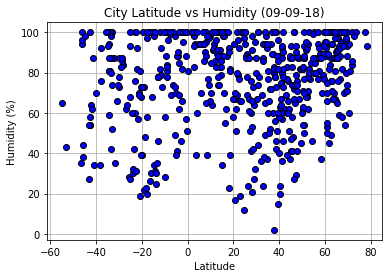

In [11]:
plt.scatter(weather_today["Latitude"], weather_today["Humidity"], marker="o",zorder=2, color="blue", edgecolor="black")
plt.title(f"City Latitude vs Humidity ({date_today})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(zorder=0)

plt.savefig("Output/Humidity in Cities.png")

plt.show()

#### Latitude vs. Cloudiness Plot

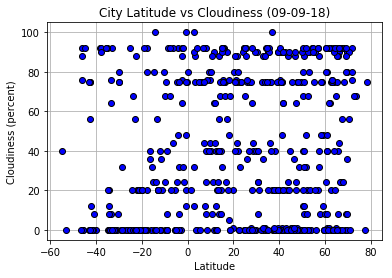

In [12]:
plt.scatter(weather_today["Latitude"], weather_today["Cloudiness"], marker="o",zorder=2, color="blue", edgecolor="black")
plt.title(f"City Latitude vs Cloudiness ({date_today})")
plt.ylabel("Cloudiness (percent)")
plt.xlabel("Latitude")
plt.grid(zorder=0)

plt.savefig("Output/Cloudiness in Cities.png")

plt.show()

#### Latitude vs. Wind Speed Plot

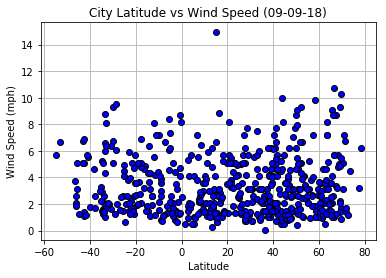

In [13]:
plt.scatter(weather_today["Latitude"], weather_today["Wind Speed"], marker="o",zorder=2, color="blue", edgecolor="black")
plt.title(f"City Latitude vs Wind Speed ({date_today})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(zorder=0)

plt.savefig("Output/Wind Speed in Cities.png")

plt.show()